In [17]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Combine energy data and climate data

- wind_speed = m/s
- solar_radiation = W/m2

In [10]:
df_energy_climate_2021 = pd.read_csv('../../data/prepared/df_energy_climate_2021.csv')
df_energy_climate_2021.head()

,datetime,wind_speed,solar_radiation,tempreture,month_year,nuclear_power,not_renewable,renewable,energy_price
0,2021-01-01 00:00:00,2.4,0,0.6,2021-01,8151.29225,34932.96750,11268.67800,48.19
1,2021-01-01 01:00:00,2.3,0,0.4,2021-01,8156.94775,34955.98100,10817.34625,44.68
2,2021-01-01 02:00:00,2.1,0,0.4,2021-01,8154.37725,35030.00525,10407.86475,42.92
3,2021-01-01 03:00:00,2.1,0,0.3,2021-01,8151.27975,34751.01925,10069.21500,40.39
4,2021-01-01 04:00:00,2.0,0,0.3,2021-01,8151.07950,35223.30725,9884.20625,40.20


## Correlation of energy and climate
- wind speed and renewable energy have high correlation
- wind speed and energy price have negative correlation

In [19]:
corr = df_energy_climate_2021.corr(numeric_only=True)

<AxesSubplot: >

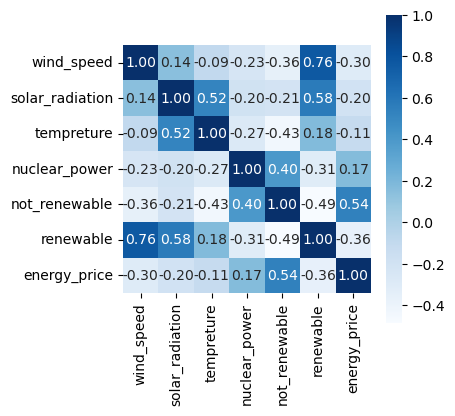

In [20]:
plt.figure(figsize=(4,4))
sns.heatmap(
    corr,
    square=True,
    cmap='Blues',
    annot=True,
    fmt='.2f'
)

In [12]:
# imports
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
%matplotlib inline

In [13]:
# resample the combined df by month
df_energy_climate_2021['datetime'] = pd.to_datetime(df_energy_climate_2021['datetime'])
df_energy_climate_2021.set_index('datetime', inplace=True)
df_energy_climate_per_month_2020 = df_energy_climate_2021.resample('M').mean()
df_energy_climate_per_month_2020.reset_index(inplace=True)

/var/folders/cz/cwy65nds1w7_vfh7mtxwrks40000gn/T/ipykernel_6497/851474653.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_energy_climate_per_month_2020 = df_energy_climate_2021.resample('M').mean()


In [14]:
df_energy_climate_per_month_2020['month_year'] = df_energy_climate_per_month_2020['datetime'].dt.to_period('M')
df_energy_climate_per_month_2020

,datetime,wind_speed,solar_radiation,tempreture,nuclear_power,not_renewable,renewable,energy_price,month_year
0,2021-01-31,3.852151,29.178763,0.517204,7964.969295,45569.511805,23676.087318,52.793199,2021-01
1,2021-02-28,3.632589,74.729167,1.754762,7952.336676,40874.537368,27328.437006,48.706905,2021-02
2,2021-03-31,3.773925,122.163978,4.671909,7402.942800,38585.923088,28693.290133,47.181680,2021-03
3,2021-04-30,3.749028,182.673611,5.959583,7147.287959,35991.170568,28652.842206,53.657153,2021-04
4,2021-05-31,4.016667,196.627688,10.562634,7096.803845,27429.723984,30241.338652,53.331505,2021-05
5,2021-06-30,2.747778,256.845833,18.802083,6865.408234,34870.207443,24928.482939,74.130722,2021-06
6,2021-07-31,2.990323,214.606183,18.173790,7418.299800,32436.169113,24610.599850,81.294892,2021-07
7,2021-08-31,3.220699,171.982527,16.304032,7787.598373,29341.528307,26102.006050,82.811855,2021-08
8,2021-09-30,2.710000,146.159722,15.107500,7574.089350,38381.178761,22223.157505,128.335778,2021-09
9,2021-10-31,3.530242,87.443548,9.499866,7119.506352,34969.039410,28548.027476,139.543387,2021-10


In [15]:
month_list = df_energy_climate_per_month_2020['month_year'].dt.strftime("%Y-%m").to_list()

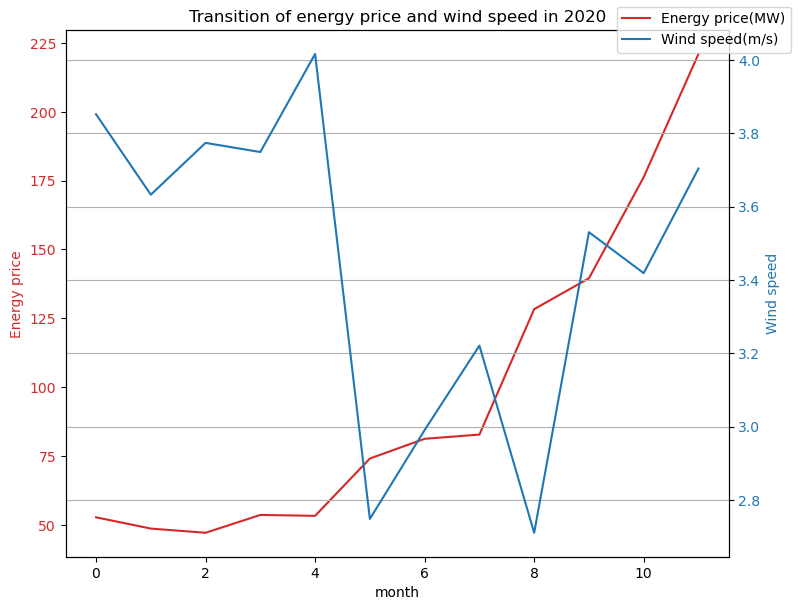

In [16]:
# plot energy price and wind speed in one graph
fig, ax1 = plt.subplots(figsize=(8, 6))

# energy_price
color_1 = 'tab:red'
ax1.set_xlabel('month')
ax1.set_ylabel('Energy price', color=color_1)
ax1.plot(
    # methode nachschauen - matplotlib / pandas
    df_energy_climate_per_month_2020['energy_price'],
    color=color_1
)

# #? xticklabels wrong
# ax1.set_xticklabels(
#     df_energy_climate_per_month_2020['month_year'], 
#     rotation=45
# )

# wind_speed
ax2 = ax1.twinx()
color_2 = 'tab:blue'
ax2.set_ylabel('Wind speed', color=color_2)
ax2.plot(
    df_energy_climate_per_month_2020['wind_speed'],
    color=color_2
)

# change label color
ax1.tick_params(axis='y', labelcolor=color_1)
ax2.tick_params(axis='y', labelcolor=color_2)

# rotate x-axis
ax2.tick_params(axis='x', rotation=45)

# adjust subplot params so that the subplots fits in to the figure area
fig.tight_layout()

plt.grid()
plt.title('Transition of energy price and wind speed in 2020')
fig.legend(['Energy price(MW)', 'Wind speed(m/s)'])
plt.show()

- Price reduction from April to May although wind speed is not high (incident in the period: first corona-lockdown in Germany in March)